In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")


Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML


0 356 400 215 273
1 436 478 632 687
2 1572 1612 608 666
3 1149 1197 142 205
4 618 666 211 266
5 633 684 630 688
6 1357 1400 628 686


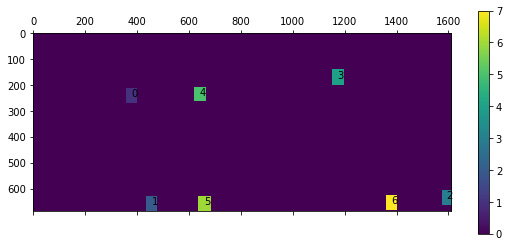

In [3]:
imze.list_regions()

In [4]:
spectra = imze.get_region_array(0, makeNullLine=True)
imze.normalize_region_array(spectra, normalize="max_intensity_region")


Found region 0 with shape (45, 59, 17900)


3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
14981.633894285647 2
14980.124761072322 2
4965.516757452595 2


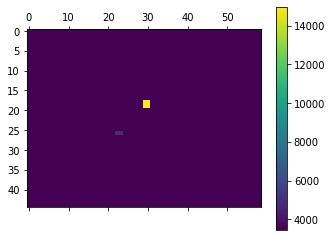

In [5]:
imze.list_highest_peaks(spectra, counter=True)

In [6]:
print("Got spectra", spectra.shape)

Got spectra (45, 59, 17900)


In [7]:
spec = SpectraRegion(spectra, imze.mzValues)

In [8]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-06-09 00:08:33,881  SpectraRegion  INFO: Creating C++ obj
2020-06-09 00:08:33,882  SpectraRegion  INFO: dimensions 17900
2020-06-09 00:08:33,883  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-09 00:08:33,885  SpectraRegion  INFO: Switching to dot mode
2020-06-09 00:08:33,887  SpectraRegion  INFO: Starting calc similarity c++
2020-06-09 00:12:47,044  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-06-09 00:12:47,067  SpectraRegion  INFO: Calculating spectra similarity
2020-06-09 00:12:47,276  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-09 00:12:47,278  SpectraRegion  INFO: Calculating dist pixel map
2020-06-09 00:13:59,460  SpectraRegion  INFO: Calculating dist pixel map done


array([[0.94999999, 0.92805586, 0.92209198, ..., 0.84539724, 0.84803558,
        0.85886   ],
       [0.92805586, 0.94999999, 0.93494097, ..., 0.8937435 , 0.89624655,
        0.90583164],
       [0.92209198, 0.93494097, 0.94999999, ..., 0.90881285, 0.90712785,
        0.91973442],
       ...,
       [0.84539724, 0.8937435 , 0.90881285, ..., 0.94999999, 0.91166953,
        0.91736187],
       [0.84803558, 0.89624655, 0.90712785, ..., 0.91166953, 0.94999993,
        0.91742621],
       [0.85886   , 0.90583164, 0.91973442, ..., 0.91736187, 0.91742621,
        0.94999999]])

In [9]:
spec.segment(method="WARD", number_of_regions=15)

2020-06-09 00:13:59,659  SpectraRegion  INFO: Calculating clusters
2020-06-09 00:14:00,129  SpectraRegion  INFO: Calculating clusters done
2020-06-09 00:14:00,159  SpectraRegion  INFO: Calculating clusters saved


array([[12, 12, 12, ...,  8,  8,  8],
       [12, 12, 12, ...,  8,  8, 14],
       [12, 12, 15, ...,  9,  8, 13],
       ...,
       [12, 12, 15, ..., 15, 14, 13],
       [12, 15, 15, ..., 15, 15, 13],
       [12, 12, 15, ..., 13, 13, 13]], dtype=int16)

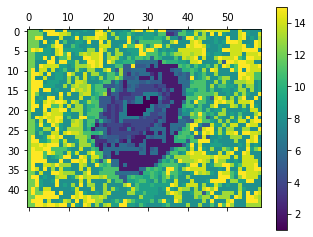

In [10]:
spec.plot_segments()

In [11]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')

spec.filter_clusters(method='remove_islands')

2020-06-09 00:14:00,514  SpectraRegion  INFO: Assigning clusters to background: {8, 9, 12, 13, 14, 15}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

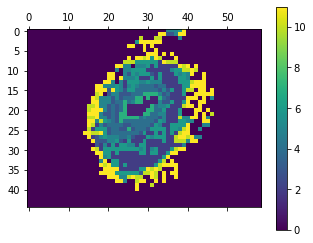

In [12]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [13]:
spec.segmented[0:5,] = 0

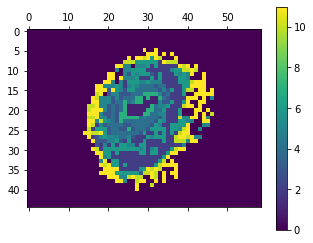

In [14]:
spec.plot_segments()

In [15]:
spec.consensus_spectra()

2020-06-09 00:14:01,136  SpectraRegion  INFO: Calculating consensus spectra
2020-06-09 00:14:01,214  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.00506906, 0.00506906, 0.00506906, ..., 0.00218381, 0.00218381,
        0.00218381]),
 11: array([0.00525317, 0.00525317, 0.00525317, ..., 0.00251473, 0.00251473,
        0.00251473]),
 10: array([0.00633127, 0.00633127, 0.00633127, ..., 0.00400464, 0.00400464,
        0.00400464]),
 6: array([0.00492166, 0.00492166, 0.00492166, ..., 0.00262737, 0.00262737,
        0.00262737]),
 2: array([0.00763823, 0.00763823, 0.00763823, ..., 0.00323441, 0.00323441,
        0.00323441]),
 5: array([0.00405525, 0.00405525, 0.00405525, ..., 0.00195404, 0.00195404,
        0.00195404]),
 3: array([0.0078593 , 0.0078593 , 0.0078593 , ..., 0.00269131, 0.00269131,
        0.00269131]),
 4: array([0.00756493, 0.00756493, 0.00756493, ..., 0.00229655, 0.00229655,
        0.00229655]),
 7: array([0.00653736, 0.00653736, 0.00653736, ..., 0.0018717 , 0.0018717 ,
        0.0018717 ]),
 1: array([0.00969619, 0.00969619, 0.00969619, ..., 0.00275836, 0.00275836,
        0.00275836])}

In [16]:
spec.consensus_similarity()

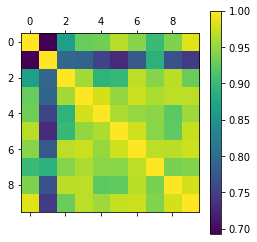

In [17]:
spec.plot_consensus_similarity()

2020-06-09 00:14:01,591  SpectraRegion  INFO: Found clusterLabels [0, 1, 2, 3, 4, 5, 6, 7, 10, 11]
2020-06-09 00:14:01,593  SpectraRegion  INFO: Processing clusterLabel 0
2020-06-09 00:14:41,008  SpectraRegion  INFO: Processing clusterLabel 1
2020-06-09 00:14:41,014  SpectraRegion  INFO: Processing clusterLabel 2
2020-06-09 00:14:41,231  SpectraRegion  INFO: Processing clusterLabel 3
2020-06-09 00:14:41,258  SpectraRegion  INFO: Processing clusterLabel 4
2020-06-09 00:14:41,307  SpectraRegion  INFO: Processing clusterLabel 5
2020-06-09 00:14:41,398  SpectraRegion  INFO: Processing clusterLabel 6
2020-06-09 00:14:41,543  SpectraRegion  INFO: Processing clusterLabel 7
2020-06-09 00:14:41,551  SpectraRegion  INFO: Processing clusterLabel 10
2020-06-09 00:14:41,581  SpectraRegion  INFO: Processing clusterLabel 11


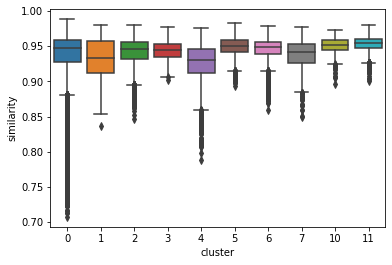

In [18]:
spec.plot_consensus_similarity(mode="spectra")

In [19]:
#spec.plot_inter_consensus_similarity()

# Differential Analysis

2020-06-09 00:14:43,780  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


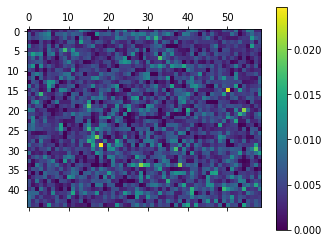

In [20]:
spec.mass_heatmap(12504)

2020-06-09 00:14:44,145  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


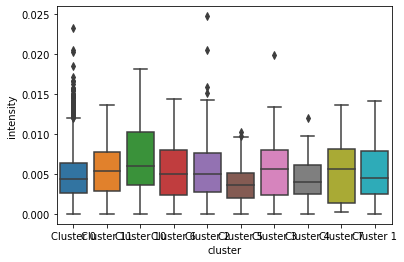

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


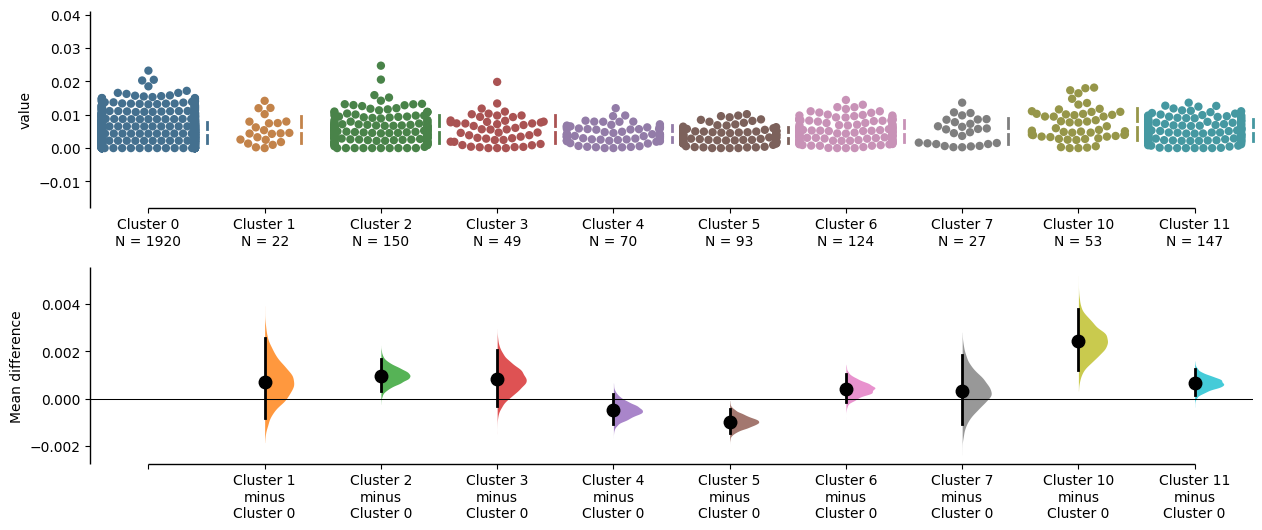

In [21]:
dfobj = spec.mass_dabest(12504)

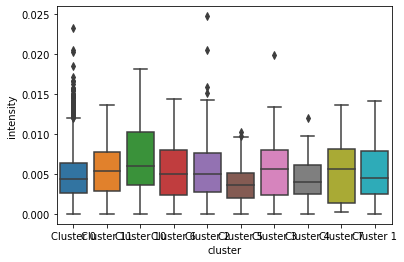

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


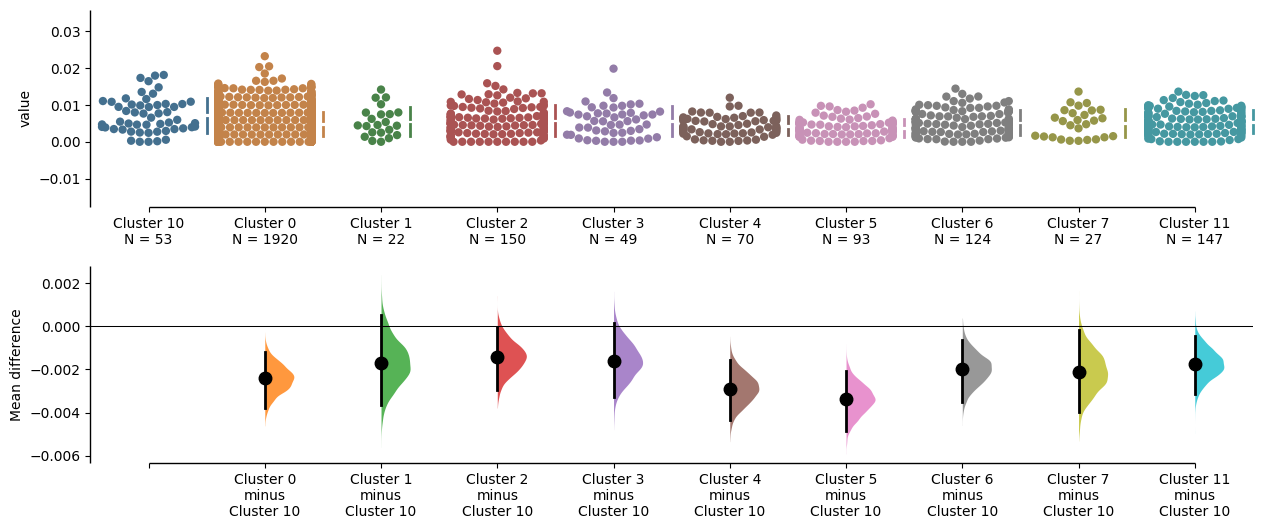

In [22]:
dfobj = spec.mass_dabest(12504, background=10)

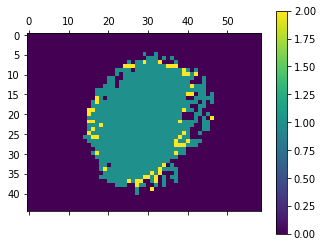

In [23]:
spec.plot_segments(highlight=10)

In [24]:
spec.clear_de_results()

In [25]:
pw = ProteinWeights("protein_weights.tsv")

In [26]:
markerGenes = spec.find_all_markers(pw, includeBackground=True)
markerGenes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,0,mass_5022_8638195589165,5022.863820,Tmsb10,5025.6,-0.542001,1.465251e-14,1920,1848,0.006199,0.005203,735,713,0.009003,0.007286
1,0,mass_5677_827634141641,5677.827634,Tmsb4x,5679.4,-1.064152,9.724258e-138,1920,1920,0.022743,0.021623,735,735,0.047501,0.043520
2,0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,-1.055223,1.110231e-128,1920,1918,0.017975,0.017063,735,735,0.037295,0.034106
3,0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,-1.023297,1.397100e-116,1920,1914,0.014284,0.013345,735,735,0.028981,0.026338
4,0,mass_5682_355033781614,5682.355034,Tmsb4x,5679.4,-1.025778,3.940118e-103,1920,1901,0.011239,0.010262,735,734,0.022832,0.020589
5,0,mass_6379_574578337418,6379.574578,Usmg5,6381.4,-0.528534,2.953520e-61,1920,1918,0.018571,0.017672,735,735,0.026768,0.025278
6,0,mass_6381_083711550742,6381.083712,Usmg5,6381.4,-0.527523,1.442124e-54,1920,1915,0.015365,0.014590,735,735,0.022125,0.020581
7,0,mass_6645_182023882486,6645.182024,Fau,6647.8,0.642936,8.628306e-186,1920,1920,0.249809,0.240316,735,735,0.159998,0.150785
8,0,mass_6897_207270507635,6897.207271,Serf2,6899.8,-0.933531,1.329848e-111,1920,1920,0.027789,0.026002,735,735,0.053029,0.047071
9,0,mass_6897_207270507635,6897.207271,Serf1,6899.8,-0.933531,1.329848e-111,1920,1920,0.027789,0.026002,735,735,0.053029,0.047071


In [27]:
spec.list_de_results()

[((0,), (1, 2, 3, 4, 5, 6, 7, 10, 11)),
 ((11,), (0, 1, 2, 3, 4, 5, 6, 7, 10)),
 ((10,), (0, 1, 2, 3, 4, 5, 6, 7, 11)),
 ((6,), (0, 1, 2, 3, 4, 5, 7, 10, 11)),
 ((2,), (0, 1, 3, 4, 5, 6, 7, 10, 11)),
 ((5,), (0, 1, 2, 3, 4, 6, 7, 10, 11)),
 ((3,), (0, 1, 2, 4, 5, 6, 7, 10, 11)),
 ((4,), (0, 1, 2, 3, 5, 6, 7, 10, 11)),
 ((7,), (0, 1, 2, 3, 4, 5, 6, 10, 11)),
 ((1,), (0, 2, 3, 4, 5, 6, 7, 10, 11))]

In [28]:
markerGenes.to_csv("marker_genes.tsv", sep="\t", index=False)

In [29]:
markerGenesNoBG = spec.find_all_markers(pw, includeBackground=False)
markerGenesNoBG

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,0,mass_5022_8638195589165,5022.863820,Tmsb10,5025.6,-0.542001,1.465251e-14,1920,1848,0.006199,0.005203,735,713,0.009003,0.007286
1,0,mass_5677_827634141641,5677.827634,Tmsb4x,5679.4,-1.064152,9.724258e-138,1920,1920,0.022743,0.021623,735,735,0.047501,0.043520
2,0,mass_5679_336767354966,5679.336767,Tmsb4x,5679.4,-1.055223,1.110231e-128,1920,1918,0.017975,0.017063,735,735,0.037295,0.034106
3,0,mass_5680_84590056829,5680.845901,Tmsb4x,5679.4,-1.023297,1.397100e-116,1920,1914,0.014284,0.013345,735,735,0.028981,0.026338
4,0,mass_5682_355033781614,5682.355034,Tmsb4x,5679.4,-1.025778,3.940118e-103,1920,1901,0.011239,0.010262,735,734,0.022832,0.020589
5,0,mass_6379_574578337418,6379.574578,Usmg5,6381.4,-0.528534,2.953520e-61,1920,1918,0.018571,0.017672,735,735,0.026768,0.025278
6,0,mass_6381_083711550742,6381.083712,Usmg5,6381.4,-0.527523,1.442124e-54,1920,1915,0.015365,0.014590,735,735,0.022125,0.020581
7,0,mass_6645_182023882486,6645.182024,Fau,6647.8,0.642936,8.628306e-186,1920,1920,0.249809,0.240316,735,735,0.159998,0.150785
8,0,mass_6897_207270507635,6897.207271,Serf2,6899.8,-0.933531,1.329848e-111,1920,1920,0.027789,0.026002,735,735,0.053029,0.047071
9,0,mass_6897_207270507635,6897.207271,Serf1,6899.8,-0.933531,1.329848e-111,1920,1920,0.027789,0.026002,735,735,0.053029,0.047071


In [30]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(markerGenes["gene"]))))

Number of unique, differentially detected proteins (from masses): 1349


In [31]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(markerGenesNoBG["gene"]))))

Number of unique, differentially detected proteins (from masses): 1310


In [32]:
markerGenesNoBG.to_csv("marker_genes_nobg.tsv", sep="\t", index=False)

In [33]:
deResTuple = spec.get_de_results( (2,) )[0]
deRes = spec.deres_to_df(deResTuple, pw)

In [34]:
deRes.to_csv("region1_cluster2.tsv", sep="\t")

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

In [41]:
! python3 /mnt/d/dev/git/scrnaseq_celltype_prediction/analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers marker_genes.tsv -n 4

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 10 clusters.
Starting analysis
0	Hepatocytes;Liver	0.0020441151968376833	2	154	{'APOA2', 'HAMP'}
0	Adipocytes;Connective tissue	0.0	1	120	{'APOC1'}
0	B cells memory;Immune system	0.0	1	66	{'GNG7'}
0	Basophils;Immune system	0.0	2	82	{'IFITM1', 'IGFBP7'}
1	Endothelial cells;Vasculature	0.11185607963581734	10	195	{'CD82', 'CLEC1B', 'S100A13', 'CD9', 'CAV1', 'CLIC4', 'AQP1', 'FABP4', 'IGFBP7', 'INMT'}
1	Hepatocytes;Liver	0.10908293712576118	7	154	{'HAMP', 'APOA2', 'OCIAD1', 'ORM1', 'RHOB', 'TTR', 'TTC36'}
1	Monocytes;Immune system	0.09426045779059931	4	102	{'IFITM3', 'PYCARD', 'RHOC', 'S100A4'}
1	Platelets;Blood	0.08244977567531526	7	131	{'CLEC1B', 'RGS18', 'CA2', 'CD9', 'PF4', 'LYZ2', 'SH3BGRL2'}
2	Platelets;Blood	0.2289227776225437	11	131

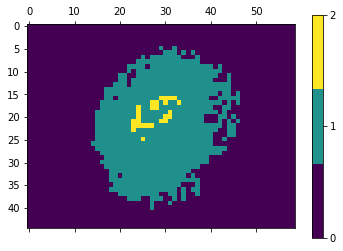

In [70]:
spec.plot_segments(highlight=(7))

In [43]:
! python3 /mnt/d/dev/git/scrnaseq_celltype_prediction/analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers marker_genes_nobg.tsv -n 4

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 10 clusters.
Starting analysis
0	Hepatocytes;Liver	0.0020441151968376833	2	154	{'HAMP', 'APOA2'}
0	Adipocytes;Connective tissue	0.0	1	120	{'APOC1'}
0	B cells memory;Immune system	0.0	1	66	{'GNG7'}
0	Basophils;Immune system	0.0	2	82	{'IGFBP7', 'IFITM1'}
1	Monocytes;Immune system	0.040952396703092434	2	102	{'IFITM3', 'S100A4'}
1	Endothelial cells;Vasculature	0.031680171980359016	5	195	{'CLIC4', 'CAV1', 'AQP1', 'IGFBP7', 'CLEC1B'}
1	Hepatic stellate cells;Liver	0.02839708660631783	2	46	{'IGFBP7', 'RBP1'}
1	Gamma delta T cells;Immune system	0.022129129800933713	4	66	{'HMGB2', 'H2AFX', 'IFITM1', 'GZMA'}
2	Hepatocytes;Liver	0.020099731346701264	3	154	{'GSTA2', 'APOA2', 'GJB2'}
2	Mesothelial cells;Epithelium	0.016062480916405136	2	58	{'GSTT1',

In [94]:
pData=pd.read_csv("p_data.txt", delimiter="\t")
pData

,sample,condition
0,0__8_33,0
1,1__9_31,0
2,2__9_33,0
3,3__9_34,0
4,4__9_35,0
5,5__9_36,0
6,6__9_37,0
7,7__10_30,0
8,8__10_31,0
9,9__10_32,0


In [50]:
allclusters = set([x for x in markerGenes["clusterID"]])
allclusters

for cluster in allclusters:
    subdf = markerGenes[markerGenes["clusterID"] == cluster]
    subdf.to_csv("slideD.0."+cluster+".tsv", sep="\t", index=True)
    
    

In [79]:
spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=True, pathPrefix="../data/test_msi/")

In [96]:
spec.run_nlempire("./", pData, "p_data.txt")

         sample  condition
0       0__8_33          0
1       1__9_31          0
2       2__9_33          0
3       3__9_34          0
4       4__9_35          0
5       5__9_36          0
6       6__9_37          0
7      7__10_30          0
8      8__10_31          0
9      9__10_32          0
10    10__10_33          0
11    11__10_34          0
12    12__10_35          0
13    13__11_32          0
14    14__11_34          0
15    15__11_35          0
16    16__11_36          0
17    17__12_32          0
18    18__12_34          0
19    19__12_35          0
20    20__12_36          0
21    21__12_37          0
22    22__13_24          0
23    23__13_35          0
24    24__13_36          0
25    25__13_37          0
26    26__14_24          0
27    27__14_35          0
28    28__14_36          0
29    29__14_37          0
..          ...        ...
230  230__24_31          1
231  231__25_20          1
232  232__25_21          1
233  233__25_22          1
234  234__25_23          1
2

In [86]:
testOut='Exception in thread "main" lmu.utils.FRuntimeException: 1: cannot normalize samples - too many non-overlapping features clustered 117 samples into 2 groups:\n\tcluster: 1 size: 116 replicates: [143__1_35, 144__1_36, 145__11_25, 146__11_31, 147__14_29, 148__14_30, 149__14_31, 150__14_32, 151__15_20, 152__15_24, 153__15_28, 154__15_29, 155__15_30, 156__15_31, 157__15_32, 158__15_33, 159__15_35, 160__16_20, 161__16_23, 162__16_24, 163__16_25, 164__16_26, 165__16_27, 166__16_28, 167__16_34, 168__16_35, 169__17_21, 170__17_23, 171__17_24, 172__17_25, 173__17_26, 174__17_34, 175__17_35, 176__18_21, 177__18_22, 178__18_23, 179__18_25, 180__18_34, 181__18_35, 182__19_20, 183__19_21, 184__19_22, 185__19_23, 186__19_32, 187__20_20, 188__20_21, 189__20_22, 190__20_23, 191__20_32, 192__20_33, 193__21_19, 194__21_20, 195__21_21, 196__21_22, 197__21_31, 198__21_32, 199__22_20, 200__22_21, 201__22_22, 202__22_28, 203__22_30, 204__22_31, 205__22_32, 206__22_33, 207__23_21, 208__23_22, 209__23_24, 210__23_25, 211__23_26, 212__23_27, 213__23_28, 214__23_29, 215__23_30, 216__23_31, 217__23_32, 218__24_19, 219__24_20, 220__24_21, 221__24_22, 222__24_23, 223__24_24, 224__24_25, 225__24_26, 226__24_27, 227__24_28, 228__24_29, 229__24_30, 230__24_31, 231__25_20, 232__25_21, 233__25_22, 234__25_23, 235__25_24, 236__25_26, 237__25_27, 238__25_28, 239__25_29, 240__25_30, 241__26_20, 242__26_21, 243__26_22, 244__26_23, 245__26_24, 246__26_25, 247__26_26, 248__26_27, 249__26_28, 250__27_17, 251__27_23, 252__27_24, 253__27_26, 254__28_17, 255__28_18, 256__28_19, 257__28_23, 258__29_17]\n\tcluster: 2 size: 1 replicates: [259__36_28]\n\n\tat nlEmpiRe.NormalizedReplicateSet.<init>(NormalizedReplicateSet.java:56)\n\tat nlEmpiRe.input.ExpressionSet.main(ExpressionSet.java:279)\n'

In [87]:
import regex as re

In [91]:
res = re.findall(r"replicates: \[(.*?)\]", testOut)
res

['143__1_35, 144__1_36, 145__11_25, 146__11_31, 147__14_29, 148__14_30, 149__14_31, 150__14_32, 151__15_20, 152__15_24, 153__15_28, 154__15_29, 155__15_30, 156__15_31, 157__15_32, 158__15_33, 159__15_35, 160__16_20, 161__16_23, 162__16_24, 163__16_25, 164__16_26, 165__16_27, 166__16_28, 167__16_34, 168__16_35, 169__17_21, 170__17_23, 171__17_24, 172__17_25, 173__17_26, 174__17_34, 175__17_35, 176__18_21, 177__18_22, 178__18_23, 179__18_25, 180__18_34, 181__18_35, 182__19_20, 183__19_21, 184__19_22, 185__19_23, 186__19_32, 187__20_20, 188__20_21, 189__20_22, 190__20_23, 191__20_32, 192__20_33, 193__21_19, 194__21_20, 195__21_21, 196__21_22, 197__21_31, 198__21_32, 199__22_20, 200__22_21, 201__22_22, 202__22_28, 203__22_30, 204__22_31, 205__22_32, 206__22_33, 207__23_21, 208__23_22, 209__23_24, 210__23_25, 211__23_26, 212__23_27, 213__23_28, 214__23_29, 215__23_30, 216__23_31, 217__23_32, 218__24_19, 219__24_20, 220__24_21, 221__24_22, 222__24_23, 223__24_24, 224__24_25, 225__24_26, 226_

TypeError: 'NoneType' object is not iterable

In [98]:
empireData=pd.read_csv("nl_diff_masses.tsv", delimiter="\t")

In [104]:
spec.find_all_markers(pw, includeBackground=False, replaceExisting=True, outdirectory="./")

         sample  condition  batch
0       0__5_29          0      0
1       1__5_32          0      0
2       2__6_30          0      0
3       3__6_31          0      0
4       4__6_32          0      0
5       5__6_34          0      0
6       6__6_36          0      0
7       7__7_25          0      0
8       8__7_27          0      0
9       9__7_28          0      0
10     10__7_30          0      0
11     11__7_32          0      0
12     12__7_37          0      0
13     13__8_34          0      0
14     14__9_22          0      0
15     15__9_23          0      0
16     16__9_38          0      0
17     17__9_40          0      0
18     18__9_42          0      0
19    19__10_41          0      0
20    20__11_20          0      0
21    21__11_21          0      0
22    22__11_41          0      0
23    23__11_44          0      0
24    24__12_20          0      0
25    25__12_21          0      0
26    26__12_23          0      0
27    27__12_44          0      0
28    28__13_1

AttributeError: 'SpectraRegion' object has no attribute 'de_results_all'